In [26]:
# Step 1: Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [27]:
# Step 2: Load the dataset
df = pd.read_csv('sales_data_sample.csv', encoding='unicode_escape')
print(" Dataset loaded successfully!")
print(df.head())

 Dataset loaded successfully!
   ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0        10107               30      95.70                2  2871.00   
1        10121               34      81.35                5  2765.90   
2        10134               41      94.74                2  3884.34   
3        10145               45      83.26                6  3746.70   
4        10159               49     100.00               14  5205.27   

         ORDERDATE   STATUS  QTR_ID  MONTH_ID  YEAR_ID  ...  \
0   2/24/2003 0:00  Shipped       1         2     2003  ...   
1    5/7/2003 0:00  Shipped       2         5     2003  ...   
2    7/1/2003 0:00  Shipped       3         7     2003  ...   
3   8/25/2003 0:00  Shipped       3         8     2003  ...   
4  10/10/2003 0:00  Shipped       4        10     2003  ...   

                    ADDRESSLINE1  ADDRESSLINE2           CITY STATE  \
0        897 Long Airport Avenue           NaN            NYC    NY   
1             59

In [28]:
# Step 3: Select useful numeric features for clustering
# We'll use 'SALES' and 'QUANTITYORDERED' as clustering attributes
data = df[['SALES', 'QUANTITYORDERED']]

In [29]:
# Step 4: Handle missing values (if any)
data = data.dropna()

In [30]:
# Step 5: Determine the optimal number of clusters using the Elbow Method
wcss = []  # Within-cluster sum of squares

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)  # inertia_ gives WCSS value

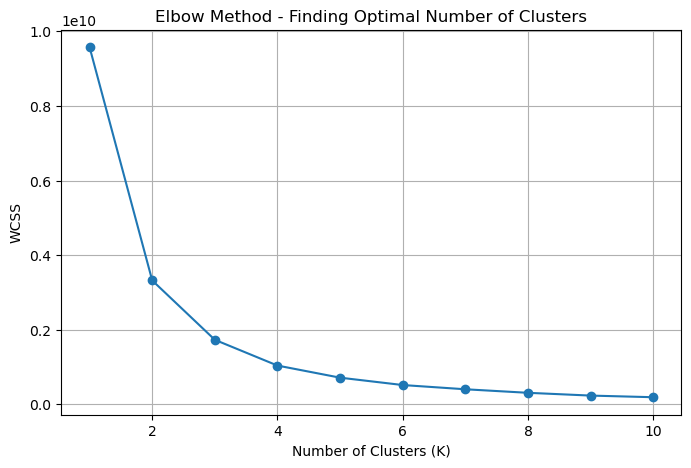

In [36]:
# Step 6: Plot the Elbow graph
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method - Finding Optimal Number of Clusters')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [32]:
# Step 7: From the Elbow plot, choose the best K (example: 3)
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(data)


In [33]:
# Step 8: Add cluster labels to dataset
data['Cluster'] = y_kmeans

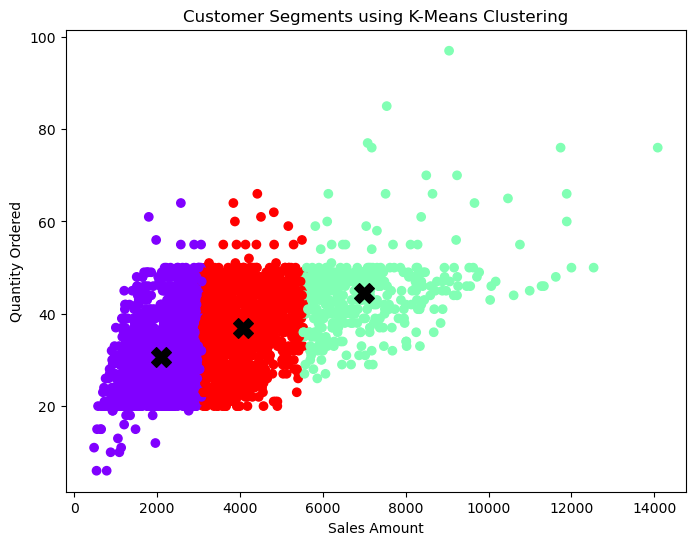

In [34]:
# Step 9: Visualize the clusters

# Step 9: Visualize the clusters
plt.figure(figsize=(8, 6))
plt.scatter(data['SALES'], data['QUANTITYORDERED'], c=data['Cluster'], cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='black', marker='X')
plt.title('Customer Segments using K-Means Clustering')
plt.xlabel('Sales Amount')
plt.ylabel('Quantity Ordered')
plt.show()



In [35]:
# Step 10: Display cluster centers
print("📍 Cluster Centers:")
print(kmeans.cluster_centers_)

📍 Cluster Centers:
[[2103.49731889   30.73338312]
 [6985.64338308   44.41791045]
 [4073.76829945   37.02310536]]
